# Neural Network From Scratch


## References

In [100]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification


## Dataset

In [101]:

n_features, n_samples = 10, 1000
x, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=0,
)
X = x.T
Y = y.reshape(-1, 1).T


## Metrics


### Cross-Entropy Loss


\begin{align*}
L(y, \hat{y}) = - [ y \times \log{\hat{y}} + (1 - y) \times \log{(1 - \hat{y})}]
\end{align*}


In [102]:
def loss(y, y_hat):
    return -((y * np.log(y_hat)) + ((1 - y) * np.log(1 - y_hat))).mean()


### Accuracy

\begin{align*}
\text{Accuracy } = \frac{1}{m} \sum_{i=0}^{m} I(y_i == \hat{y_i})
\end{align*}


In [103]:
def accuracy(y, y_hat, threshold=0.5):
    return np.int32(np.int32(y_hat > threshold) == y).sum() / y.shape[1]


## Activation Function




\begin{align*}
\text{Sigmoid } = \sigma{(x)} &= \frac{1}{1 + e^{-x}}\\
\\
\text{Derivative of Sigmoid } = \frac{\delta \sigma{(x)}}{\delta x} &= \frac{-1}{(1 + e^{-x})^2} . {- e^{-x}}\\
&= \frac{1}{1 + e^{-x}} . \frac{e^{-x}}{1 + e^{-x}}\\
&= \frac{1}{1 + e^{-x}} . \frac{1+e^{-x} - 1}{1 + e^{-x}}\\
\frac{\delta \sigma{(x)}}{\delta x} &= \sigma(x) . (1 - \sigma(x))
\end{align*}



In [104]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def derivative_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))


## Architecture


```sh
                                                                        w2      b2  
         X ---------+                                                A  |       |  A
                    |             FORWARD PASS   >>>>           dw2  |  V       V  | db2
                    V                                                ^             ^
        w1 ------->>>   z1 = w1.X + b1 ----> a1 = sigmoid(z1) ---->  z2 = w2.a1 + b2  ----> a2 = sigmoid(z2) ---> L (a2, y)
        <+--dw1--   A                                 
                    |     <+--dz1--               <+--da1--               <+--dz2--               <+--da2--           
        b1 ---------+                                   
        <+--db1--                                                    <<<< BACKWARD PASS      
```


||||
|-|-|-|
| $W^{[l]}$ | $( n^{[l]} , n^{[l-1]} )$ | $dW^{[l]}$ |
| $b^{[l]}$ | $( 1 , n^{[l]}  )$ | $db^{[l]}$ |
| $Z^{[l]}$ | $( n^{[l]} , n^{[l-1]} )$ | $dZ^{[l]}$ |
| $A^{[l]}$ | $( n^{[l]} , n^{[l-1]} )$ | $dA^{[l]}$ |


### Forward

\begin{align*}
z1 = w1.X + b1 \\
a1 = \sigma{(z1)} \\\\
z2 = w2.a1 + b2 \\
a2 = \sigma{(z2)}
\end{align*}


In [105]:

def forward(X, w1, b1, w2, b2):
    z1 = (w1.T @ X) + b1
    a1 = sigmoid(z1)

    z2 = (w2.T @ a1) + b2
    a2 = sigmoid(z2)

    return a2, a1, z2, z1



### Backward

\begin{align*}
\text{Loss with final layer value (output) }L(y, a2) &= - [ y \times \log{a2} + (1 - y) \times \log{(1 - a2)}] \\\\\\
da2 = \frac{\delta L}{\delta a2} &= - \frac{y}{a2} + \frac{1 - y}{1 - a2} \\
dz2 = \frac{\delta L}{\delta z2} &= \frac{\delta L}{\delta a2} . \frac{\delta a2}{\delta z2} = da2.\frac{\delta a2}{\delta z2} =  -( \frac{y}{a2} - \frac{1 - y}{1 - a2} ) . (a2.(1-a2)) = a2 - y \\
dw2 = \frac{\delta L}{\delta w2} &= \frac{\delta L}{\delta z2} . \frac{\delta z2}{\delta w2} = dz2 . \frac{\delta z2}{\delta w2} = dz2 . a1\\
db2 = \frac{\delta L}{\delta b2} &= \frac{\delta L}{\delta z2} . \frac{\delta z2}{\delta b2} = dz2 \\\\
da1 = \frac{\delta L}{\delta a1} &= \frac{\delta L}{\delta z2} . \frac{\delta z2}{\delta a1} = dz2 . \frac{\delta z2}{\delta a1} = -( \frac{y}{a2} - \frac{1 - y}{1 - a2} ) . (a2.(1-a2)) . w2 = (a2 - y).w2
\end{align*}


In [106]:

def backward(X, Y, a1, a2, w1, b1, w2, b2):
    da2 = -(Y / a2) + ((1 - Y) / (1 - a2))
    dz2 = da2 * derivative_sigmoid(a2)

    dw2 = np.mean(a1 @ dz2.T, axis=1, keepdims=True)
    db2 = np.mean(dz2, axis=1, keepdims=True)

    da1 = w2 @ dz2
    dz1 = da1 * derivative_sigmoid(a1)

    dw1 = np.mean(X @ dz1.T, axis=1, keepdims=True)
    db1 = np.mean(dz1, axis=1, keepdims=True)

    return da2, da1, dz2, dz1, dw2, dw1, db2, db1



## Gradient Descent Algorithm


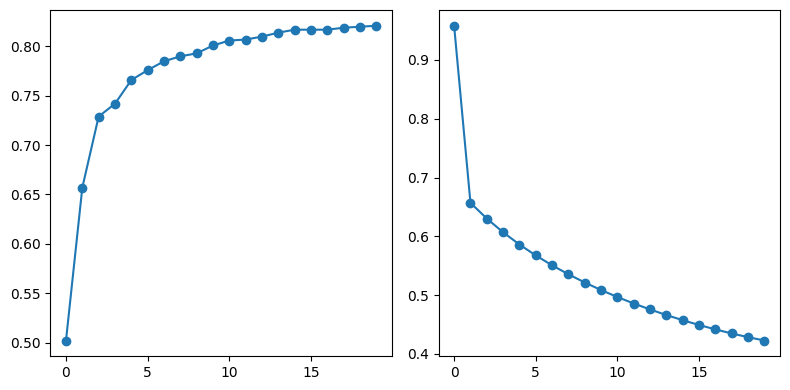

In [107]:

n_layer_1_nodes = 10

n_final_output = 1

w1 = np.random.rand(n_features, n_layer_1_nodes)
b1 = np.random.rand(n_layer_1_nodes, 1)

w2 = np.random.rand(n_layer_1_nodes, n_final_output)
b2 = np.random.rand(n_final_output, 1)

loss_history = []
accuracy_history = []
lr = 0.0001


for epoch in range(1000):

    a2, a1, z2, z1 = forward(X, w1, b1, w2, b2)
    da2, da1, dz2, dz1, dw2, dw1, db2, db1 = backward(X, y, a1, a2, w1, b1, w2, b2)

    w2 = w2 - (lr * dw2)
    b2 = b2 - (lr * db2)

    w1 = w1 - (lr * dw1)
    b1 = b1 - (lr * db1)

    if epoch % 50 == 0:

        prediction, _, _, _ = forward(X, w1, b1, w2, b2)
        loss_val = loss(Y, prediction)
        accuracy_val = accuracy(Y, prediction)

        loss_history.append(loss_val)
        accuracy_history.append(accuracy_val)
a2.shape
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(accuracy_history, "o-")
ax[1].plot(loss_history, "o-")

fig.tight_layout()
fig.show(warn=False)

